In [1]:
import pandas as pd

In [2]:
dem = pd.read_csv('cleaned_data/cleaned_dem.csv')
dem.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Population_Size,Poverty,Age_19_Under,Age_19_64,Age_65_84,Age_85_and_Over,White,Black,Native_American,Asian,Hispanic
0,1,1,Autauga,Alabama,AL,48612,10.4,13076.628,30285.276,4763.976,437.508,39229.884,8409.876,243.060,291.672,826.404
1,1,3,Baldwin,Alabama,AL,162586,10.2,38207.710,98039.358,23574.970,2926.548,143726.024,16096.014,812.930,650.344,3739.478
2,1,5,Barbour,Alabama,AL,28414,22.1,6904.602,17758.750,3296.024,454.624,14832.108,13297.752,113.656,85.242,880.834
3,1,7,Bibb,Alabama,AL,21516,16.8,5292.936,13619.628,2345.244,258.192,16524.288,4841.100,64.548,21.516,301.224
4,1,9,Blount,Alabama,AL,55725,11.9,13652.625,34605.225,6742.725,724.425,54108.975,835.875,278.625,111.450,3510.675


In [3]:
# change percentages to value

def perc_to_num(df, list_of_cols):
    for col in list_of_cols:
        df[col] = df[col].multiply(dem['Population_Size'],axis='index').div(100)

In [4]:
def num_to_perc(df, list_of_cols):
    for col in list_of_cols:
        df[col] = df[col].multiply(100).div(dem['Population_Size'],axis='index')

In [5]:
num_to_perc(dem, ['Age_19_Under', 
                      'Age_19_64', 'Age_65_84', 'Age_85_and_Over', 'White',
                      'Black','Native_American','Asian','Hispanic',])

In [6]:
dem.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Population_Size,Poverty,Age_19_Under,Age_19_64,Age_65_84,Age_85_and_Over,White,Black,Native_American,Asian,Hispanic
0,1,1,Autauga,Alabama,AL,48612,10.4,26.9,62.3,9.8,0.9,80.7,17.3,0.5,0.6,1.7
1,1,3,Baldwin,Alabama,AL,162586,10.2,23.5,60.3,14.5,1.8,88.4,9.9,0.5,0.4,2.3
2,1,5,Barbour,Alabama,AL,28414,22.1,24.3,62.5,11.6,1.6,52.2,46.8,0.4,0.3,3.1
3,1,7,Bibb,Alabama,AL,21516,16.8,24.6,63.3,10.9,1.2,76.8,22.5,0.3,0.1,1.4
4,1,9,Blount,Alabama,AL,55725,11.9,24.5,62.1,12.1,1.3,97.1,1.5,0.5,0.2,6.3


In [7]:
dem['Pop_proportion'] = dem['Population_Size']/dem['Population_Size'].sum() 
# for col in col_list:
#     df[col] = df[col] * df['Pop_proportion']

In [8]:
dem['Population_Size'].sum()

296410404

In [9]:
dem['Pop_proportion'] = dem['Pop_proportion']*100

In [10]:
dem.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Population_Size,Poverty,Age_19_Under,Age_19_64,Age_65_84,Age_85_and_Over,White,Black,Native_American,Asian,Hispanic,Pop_proportion
0,1,1,Autauga,Alabama,AL,48612,10.4,26.9,62.3,9.8,0.9,80.7,17.3,0.5,0.6,1.7,0.016400
1,1,3,Baldwin,Alabama,AL,162586,10.2,23.5,60.3,14.5,1.8,88.4,9.9,0.5,0.4,2.3,0.054852
2,1,5,Barbour,Alabama,AL,28414,22.1,24.3,62.5,11.6,1.6,52.2,46.8,0.4,0.3,3.1,0.009586
3,1,7,Bibb,Alabama,AL,21516,16.8,24.6,63.3,10.9,1.2,76.8,22.5,0.3,0.1,1.4,0.007259
4,1,9,Blount,Alabama,AL,55725,11.9,24.5,62.1,12.1,1.3,97.1,1.5,0.5,0.2,6.3,0.018800


In [11]:
dem = dem[dem.CHSI_State_Name != 'Alaska']

In [12]:
dem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3114 entries, 0 to 3140
Data columns (total 17 columns):
State_FIPS_Code     3114 non-null int64
County_FIPS_Code    3114 non-null int64
CHSI_County_Name    3114 non-null object
CHSI_State_Name     3114 non-null object
CHSI_State_Abbr     3114 non-null object
Population_Size     3114 non-null int64
Poverty             3114 non-null float64
Age_19_Under        3114 non-null float64
Age_19_64           3114 non-null float64
Age_65_84           3114 non-null float64
Age_85_and_Over     3114 non-null float64
White               3114 non-null float64
Black               3114 non-null float64
Native_American     3114 non-null float64
Asian               3114 non-null float64
Hispanic            3114 non-null float64
Pop_proportion      3114 non-null float64
dtypes: float64(11), int64(3), object(3)
memory usage: 437.9+ KB


### Merge DF's

In [82]:
risk = pd.read_csv('/Users/stephaniekendall/Desktop/Flatiron/projects/mod4_project/cleaned_data/final_risk.csv')
risk.head()


,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,Uninsured
0,1,1,Autauga,Alabama,AL,29,27.800,78.60,24.500000,29.1,26.600000,14.2,5690
1,1,3,Baldwin,Alabama,AL,16,27.200,76.20,23.600000,30.5,24.600000,7.2,19798
2,1,5,Barbour,Alabama,AL,51,29.795,80.08,25.600000,31.6,17.700000,6.6,5126
3,1,7,Bibb,Alabama,AL,42,29.795,86.60,26.897561,31.6,23.822917,13.1,3315
4,1,9,Blount,Alabama,AL,28,33.500,74.60,24.200000,31.6,23.600000,8.4,8131


In [83]:
risk_dem = dem.merge(risk, how='outer')

In [84]:
risk_dem.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Population_Size,Poverty,Age_19_Under,Age_19_64,Age_65_84,...,Hispanic,Pop_proportion,Strata_ID_Number,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,Uninsured
0,1,1,Autauga,Alabama,AL,48612,10.4,26.9,62.3,9.8,...,1.7,0.016400,29,27.800,78.60,24.500000,29.1,26.600000,14.2,5690
1,1,3,Baldwin,Alabama,AL,162586,10.2,23.5,60.3,14.5,...,2.3,0.054852,16,27.200,76.20,23.600000,30.5,24.600000,7.2,19798
2,1,5,Barbour,Alabama,AL,28414,22.1,24.3,62.5,11.6,...,3.1,0.009586,51,29.795,80.08,25.600000,31.6,17.700000,6.6,5126
3,1,7,Bibb,Alabama,AL,21516,16.8,24.6,63.3,10.9,...,1.4,0.007259,42,29.795,86.60,26.897561,31.6,23.822917,13.1,3315
4,1,9,Blount,Alabama,AL,55725,11.9,24.5,62.1,12.1,...,6.3,0.018800,28,33.500,74.60,24.200000,31.6,23.600000,8.4,8131


In [85]:
risk_dem = risk_dem.drop(['Strata_ID_Number'], axis=1)

In [86]:
risk_dem.describe()

,State_FIPS_Code,County_FIPS_Code,Population_Size,Poverty,Age_19_Under,Age_19_64,Age_65_84,Age_85_and_Over,White,Black,...,Asian,Hispanic,Pop_proportion,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,Uninsured
count,3114.000000,3114.000000,3.114000e+03,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,...,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.000000,3114.00000,3.114000e+03
mean,30.550096,103.279383,9.497326e+04,13.360613,24.766281,60.260244,12.845697,2.128613,87.299968,9.054432,...,1.090719,7.047013,0.032041,26.450817,78.829002,24.109542,26.218840,23.002832,7.78879,1.272315e+04
std,14.967581,108.066768,3.076479e+05,4.882712,3.186610,3.276501,3.288312,0.942102,15.729090,14.589597,...,2.642466,12.511147,0.103791,6.001099,4.367147,4.301393,4.350660,5.110810,2.61366,5.483046e+04
min,1.000000,1.000000,6.200000e+01,2.200000,1.400000,48.800000,2.100000,0.100000,6.700000,0.000000,...,0.000000,0.000000,0.000021,8.300000,63.100000,4.200000,7.200000,3.600000,0.50000,-2.222000e+03
25%,19.000000,35.000000,1.133625e+04,9.800000,22.700000,58.300000,10.700000,1.500000,83.300000,0.500000,...,0.300000,1.100000,0.003825,22.700000,76.300000,22.000000,23.646667,20.100000,6.10000,1.563500e+03
50%,29.000000,78.500000,2.539100e+04,12.700000,24.600000,60.300000,12.500000,1.900000,94.200000,2.100000,...,0.500000,2.300000,0.008566,26.500000,78.818367,24.600000,25.718033,22.825490,7.70000,3.448500e+03
75%,46.000000,133.000000,6.450725e+04,16.200000,26.400000,62.300000,14.700000,2.600000,97.600000,10.400000,...,1.000000,6.375000,0.021763,29.795000,81.160494,26.100000,28.821935,25.906173,9.20000,8.125250e+03
max,56.000000,840.000000,9.935475e+06,36.200000,43.700000,82.300000,29.200000,7.600000,100.000000,86.000000,...,55.900000,97.500000,3.351932,52.400000,96.400000,42.600000,47.100000,46.200000,20.80000,2.167891e+06


In [87]:
risk_dem['Uninsured'] = round(risk_dem['Uninsured']/risk_dem['Population_Size']*100,2)
risk_dem.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Population_Size,Poverty,Age_19_Under,Age_19_64,Age_65_84,...,Asian,Hispanic,Pop_proportion,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,Uninsured
0,1,1,Autauga,Alabama,AL,48612,10.4,26.9,62.3,9.8,...,0.6,1.7,0.016400,27.800,78.60,24.500000,29.1,26.600000,14.2,11.70
1,1,3,Baldwin,Alabama,AL,162586,10.2,23.5,60.3,14.5,...,0.4,2.3,0.054852,27.200,76.20,23.600000,30.5,24.600000,7.2,12.18
2,1,5,Barbour,Alabama,AL,28414,22.1,24.3,62.5,11.6,...,0.3,3.1,0.009586,29.795,80.08,25.600000,31.6,17.700000,6.6,18.04
3,1,7,Bibb,Alabama,AL,21516,16.8,24.6,63.3,10.9,...,0.1,1.4,0.007259,29.795,86.60,26.897561,31.6,23.822917,13.1,15.41
4,1,9,Blount,Alabama,AL,55725,11.9,24.5,62.1,12.1,...,0.2,6.3,0.018800,33.500,74.60,24.200000,31.6,23.600000,8.4,14.59


In [60]:
risk_dem.to_csv('/Users/stephaniekendall/Desktop/Flatiron/projects/mod4_project/cleaned_data/dem_risk.csv',index=False)

#### Replace NaN values with mean

In [88]:
risky = risk_dem[risk_dem.CHSI_County_Name != 'Broomfield']
risky2 = risky[risky.CHSI_State_Abbr != 'DC']
risky3 = risky2[risky2.CHSI_County_Name != 'Kalawao']

In [90]:
risky3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3111 entries, 0 to 3113
Data columns (total 24 columns):
State_FIPS_Code     3111 non-null int64
County_FIPS_Code    3111 non-null int64
CHSI_County_Name    3111 non-null object
CHSI_State_Name     3111 non-null object
CHSI_State_Abbr     3111 non-null object
Population_Size     3111 non-null int64
Poverty             3111 non-null float64
Age_19_Under        3111 non-null float64
Age_19_64           3111 non-null float64
Age_65_84           3111 non-null float64
Age_85_and_Over     3111 non-null float64
White               3111 non-null float64
Black               3111 non-null float64
Native_American     3111 non-null float64
Asian               3111 non-null float64
Hispanic            3111 non-null float64
Pop_proportion      3111 non-null float64
No_Exercise         3111 non-null float64
Few_Fruit_Veg       3111 non-null float64
Obesity             3111 non-null float64
High_Blood_Pres     3111 non-null float64
Smoker              

In [91]:
risk_dem.loc[risk_dem['CHSI_County_Name'] == 'Broomfield']

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Population_Size,Poverty,Age_19_Under,Age_19_64,Age_65_84,...,Asian,Hispanic,Pop_proportion,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,Uninsured
222,8,14,Broomfield,Colorado,CO,43478,5.1,28.6,64.6,6.4,...,4.5,10.2,0.014668,14.4,77.873077,21.5,15.9,17.4,3.3,-5.11


In [92]:
risk_dem.loc[222, 'Uninsured'] = 14.13

In [94]:
risk_dem.iloc[222:224]

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Population_Size,Poverty,Age_19_Under,Age_19_64,Age_65_84,...,Asian,Hispanic,Pop_proportion,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,Uninsured
222,8,14,Broomfield,Colorado,CO,43478,5.1,28.6,64.6,6.4,...,4.5,10.2,0.014668,14.4,77.873077,21.5,15.900000,17.4,3.3,14.13
223,8,15,Chaffee,Colorado,CO,16968,11.6,18.9,62.9,16.1,...,0.5,8.6,0.005724,21.4,71.200000,14.3,18.888462,21.9,5.0,13.70


In [95]:
risk_dem = risk_dem.loc[risk_dem['CHSI_State_Abbr'] != 'DC']

In [75]:
risk_dem[risk_dem.CHSI_State_Abbr != 'DC']

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Population_Size,Poverty,Age_19_Under,Age_19_64,Age_65_84,...,Asian,Hispanic,Pop_proportion,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,Uninsured
0,1,1,Autauga,Alabama,AL,48612,10.4,26.9,62.3,9.8,...,0.6,1.7,0.016400,27.800000,78.600000,24.500000,29.100000,26.600000,14.200000,11.70
1,1,3,Baldwin,Alabama,AL,162586,10.2,23.5,60.3,14.5,...,0.4,2.3,0.054852,27.200000,76.200000,23.600000,30.500000,24.600000,7.200000,12.18
2,1,5,Barbour,Alabama,AL,28414,22.1,24.3,62.5,11.6,...,0.3,3.1,0.009586,29.795000,80.080000,25.600000,31.600000,17.700000,6.600000,18.04
3,1,7,Bibb,Alabama,AL,21516,16.8,24.6,63.3,10.9,...,0.1,1.4,0.007259,29.795000,86.600000,26.897561,31.600000,23.822917,13.100000,15.41
4,1,9,Blount,Alabama,AL,55725,11.9,24.5,62.1,12.1,...,0.2,6.3,0.018800,33.500000,74.600000,24.200000,31.600000,23.600000,8.400000,14.59
5,1,11,Bullock,Alabama,AL,11055,26.2,24.7,63.2,10.0,...,0.2,5.9,0.003730,29.795000,80.080000,26.897561,31.600000,23.822917,9.651563,20.76
6,1,13,Butler,Alabama,AL,20766,20.0,25.6,58.5,13.6,...,0.3,0.9,0.007006,24.500000,80.080000,22.000000,31.600000,27.300000,9.500000,19.53
7,1,15,Calhoun,Alabama,AL,112141,16.4,24.1,61.6,12.7,...,0.8,2.0,0.037833,29.200000,81.900000,27.000000,33.200000,25.500000,11.200000,14.67
8,1,17,Chambers,Alabama,AL,35460,16.2,24.8,59.5,13.5,...,0.2,1.2,0.011963,34.700000,84.600000,26.897561,31.600000,11.700000,17.100000,15.60
9,1,19,Cherokee,Alabama,AL,24522,15.2,21.9,61.4,15.2,...,0.3,1.1,0.008273,29.795000,80.080000,26.897561,31.600000,23.600000,13.300000,14.61


In [96]:
risk_dem.loc[risk_dem['CHSI_County_Name'] == 'Kalawao']

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Population_Size,Poverty,Age_19_Under,Age_19_64,Age_65_84,...,Asian,Hispanic,Pop_proportion,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,Uninsured
519,15,5,Kalawao,Hawaii,HI,111,13.350159,1.4,82.3,11.7,...,55.9,5.4,0.000037,19.1,76.25,18.125,23.85,20.15,6.65,-2001.8


In [97]:
risk_dem.loc[519, 'Uninsured'] = 14.13

/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [57]:
risky3['Uninsured_Prop'] = (sum(risky3['Uninsured'])/len(risky3['Population_Size']))

/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [98]:
risky3.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Population_Size,Poverty,Age_19_Under,Age_19_64,Age_65_84,...,Asian,Hispanic,Pop_proportion,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,Uninsured
0,1,1,Autauga,Alabama,AL,48612,10.4,26.9,62.3,9.8,...,0.6,1.7,0.016400,27.800,78.60,24.500000,29.1,26.600000,14.2,11.70
1,1,3,Baldwin,Alabama,AL,162586,10.2,23.5,60.3,14.5,...,0.4,2.3,0.054852,27.200,76.20,23.600000,30.5,24.600000,7.2,12.18
2,1,5,Barbour,Alabama,AL,28414,22.1,24.3,62.5,11.6,...,0.3,3.1,0.009586,29.795,80.08,25.600000,31.6,17.700000,6.6,18.04
3,1,7,Bibb,Alabama,AL,21516,16.8,24.6,63.3,10.9,...,0.1,1.4,0.007259,29.795,86.60,26.897561,31.6,23.822917,13.1,15.41
4,1,9,Blount,Alabama,AL,55725,11.9,24.5,62.1,12.1,...,0.2,6.3,0.018800,33.500,74.60,24.200000,31.6,23.600000,8.4,14.59


In [99]:
risk_dem.describe()

,State_FIPS_Code,County_FIPS_Code,Population_Size,Poverty,Age_19_Under,Age_19_64,Age_65_84,Age_85_and_Over,White,Black,...,Asian,Hispanic,Pop_proportion,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,Uninsured
count,3113.000000,3113.000000,3.113000e+03,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,...,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000
mean,30.556376,103.312239,9.482693e+04,13.359284,24.767331,60.258304,12.846450,2.128718,87.315805,9.039030,...,1.090042,7.046579,0.031992,26.452183,78.832449,24.110445,26.218686,23.003668,7.788786,14.133299
std,14.965882,108.068572,3.075889e+05,4.882933,3.186584,3.275238,3.288571,0.942235,15.706766,14.566599,...,2.642620,12.513133,0.103771,6.001579,4.363611,4.301789,4.351350,5.111418,2.614080,4.960910
min,1.000000,1.000000,6.200000e+01,2.200000,1.400000,48.800000,2.100000,0.100000,6.700000,0.000000,...,0.000000,0.000000,0.000021,8.300000,63.100000,4.200000,7.200000,3.600000,0.500000,3.590000
25%,19.000000,35.000000,1.133300e+04,9.800000,22.700000,58.300000,10.700000,1.500000,83.300000,0.500000,...,0.300000,1.100000,0.003823,22.700000,76.300000,22.000000,23.646667,20.100000,6.100000,10.510000
50%,29.000000,79.000000,2.539100e+04,12.700000,24.600000,60.300000,12.500000,1.900000,94.200000,2.100000,...,0.500000,2.300000,0.008566,26.500000,78.818367,24.600000,25.718033,22.825490,7.700000,13.310000
75%,46.000000,133.000000,6.420500e+04,16.200000,26.400000,62.300000,14.700000,2.600000,97.600000,10.400000,...,1.000000,6.300000,0.021661,29.795000,81.160494,26.100000,28.828205,25.906173,9.200000,17.040000
max,56.000000,840.000000,9.935475e+06,36.200000,43.700000,82.300000,29.200000,7.600000,100.000000,86.000000,...,55.900000,97.500000,3.351932,52.400000,96.400000,42.600000,47.100000,46.200000,20.800000,38.390000


In [101]:
risk_dem.to_csv('/Users/stephaniekendall/Desktop/Flatiron/projects/mod4_project/cleaned_data/final_df.csv',index=False)

In [102]:
risk_dem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3113 entries, 0 to 3113
Data columns (total 24 columns):
State_FIPS_Code     3113 non-null int64
County_FIPS_Code    3113 non-null int64
CHSI_County_Name    3113 non-null object
CHSI_State_Name     3113 non-null object
CHSI_State_Abbr     3113 non-null object
Population_Size     3113 non-null int64
Poverty             3113 non-null float64
Age_19_Under        3113 non-null float64
Age_19_64           3113 non-null float64
Age_65_84           3113 non-null float64
Age_85_and_Over     3113 non-null float64
White               3113 non-null float64
Black               3113 non-null float64
Native_American     3113 non-null float64
Asian               3113 non-null float64
Hispanic            3113 non-null float64
Pop_proportion      3113 non-null float64
No_Exercise         3113 non-null float64
Few_Fruit_Veg       3113 non-null float64
Obesity             3113 non-null float64
High_Blood_Pres     3113 non-null float64
Smoker              

#### Stats Stuff

In [107]:
col_list = ['Population_Size', 'Poverty', 'Age_19_Under', 'Age_19_64', 'Age_65_84', 'Age_85_and_Over', 'White', 'Black', 'Native_American', 'Asian', 'Hispanic', 'No_Exercise', 'Few_Fruit_Veg', 'Obesity', 'High_Blood_Pres', 'Smoker', 'Diabetes', 'Uninsured']
for col in col_list:
    risk_dem[col] = risk_dem[col] * risk_dem['Pop_proportion']

risk_dem.head()
    

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Population_Size,Poverty,Age_19_Under,Age_19_64,Age_65_84,...,Asian,Hispanic,Pop_proportion,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,Uninsured
0,1,1,Autauga,Alabama,AL,797.248178,0.170562,0.441166,1.021735,0.160722,...,0.009840,0.027880,0.016400,0.455927,1.289058,0.401806,0.477247,0.436246,0.232883,0.191883
1,1,3,Baldwin,Alabama,AL,8918.110511,0.559487,1.289014,3.307555,0.795349,...,0.021941,0.126159,0.054852,1.491965,4.179696,1.294499,1.672975,1.349351,0.394932,0.668093
2,1,5,Barbour,Alabama,AL,272.377550,0.211851,0.232941,0.599127,0.111198,...,0.002876,0.029717,0.009586,0.285616,0.767650,0.245402,0.302919,0.169673,0.063268,0.172932
3,1,7,Bibb,Alabama,AL,156.181514,0.121949,0.178568,0.459485,0.079122,...,0.000726,0.010162,0.007259,0.216278,0.628617,0.195245,0.229380,0.172927,0.095091,0.111859
4,1,9,Blount,Alabama,AL,1047.627068,0.223719,0.460599,1.167477,0.227479,...,0.003760,0.118440,0.018800,0.629798,1.402476,0.454959,0.594078,0.443679,0.157920,0.274291


In [104]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

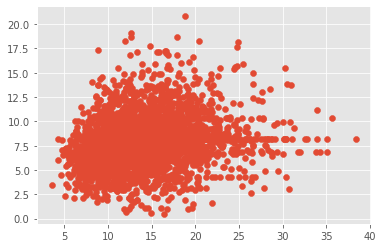

In [105]:
plt.scatter(risk_dem.Uninsured, risk_dem.Diabetes, label='data')

In [47]:
# dv_column  - str, name of the column
def make_column_scatters(df, dv_column, fig_columns=2, select_columns=None, figure_size=[30,30]):
    #if a list of columns is passed use that, otherwise use all df columns
    if select_columns is not None:
        column_list = select_columns
    else:
        column_list = list(df.columns)
        column_list.remove(dv_column)
    # Set matplotlib style
    plt.style.use('ggplot')
    # get number of rows and columns for the figure grid of plots
    df_cols_len = len(column_list)
    fig_rows = df_cols_len // fig_columns
    if df_cols_len % fig_columns != 0:
        fig_rows += 1
    # create fig and subplots
    fig, ax = plt.subplots(nrows=fig_rows, ncols=fig_columns, figsize=figure_size, dpi=100,sharex=False, sharey=False)
    # create a list of subpolot axes
    list_of_axes = []
    if (fig_rows == 1) | (fig_columns == 1):
        for n in range(max([fig_rows, fig_columns])):
            list_of_axes.append(ax[n])
    else:
        for n in range(fig_rows):
            for i in range(fig_columns):
                list_of_axes.append(ax[n,i])
    # plot a histogram on each axes
    for n in range(df_cols_len):
        list_of_axes[n].scatter(df[column_list[n]], df[dv_column])
        list_of_axes[n].set_title(f'{column_list[n]}, dtype:{np.dtype(df[column_list[n]]).name}')

In [48]:
col_list = ['Pop_proportion', 'Poverty', 'Age_19_Under', 
                      'Age_19_64', 'Age_65_84', 'Age_85_and_Over', 'White',
                      'Black','Native_American','Asian','Hispanic','No_Exercise',
                      'Few_Fruit_Veg', 'Obesity', 'High_Blood_Pres','Smoker','Uninsured']

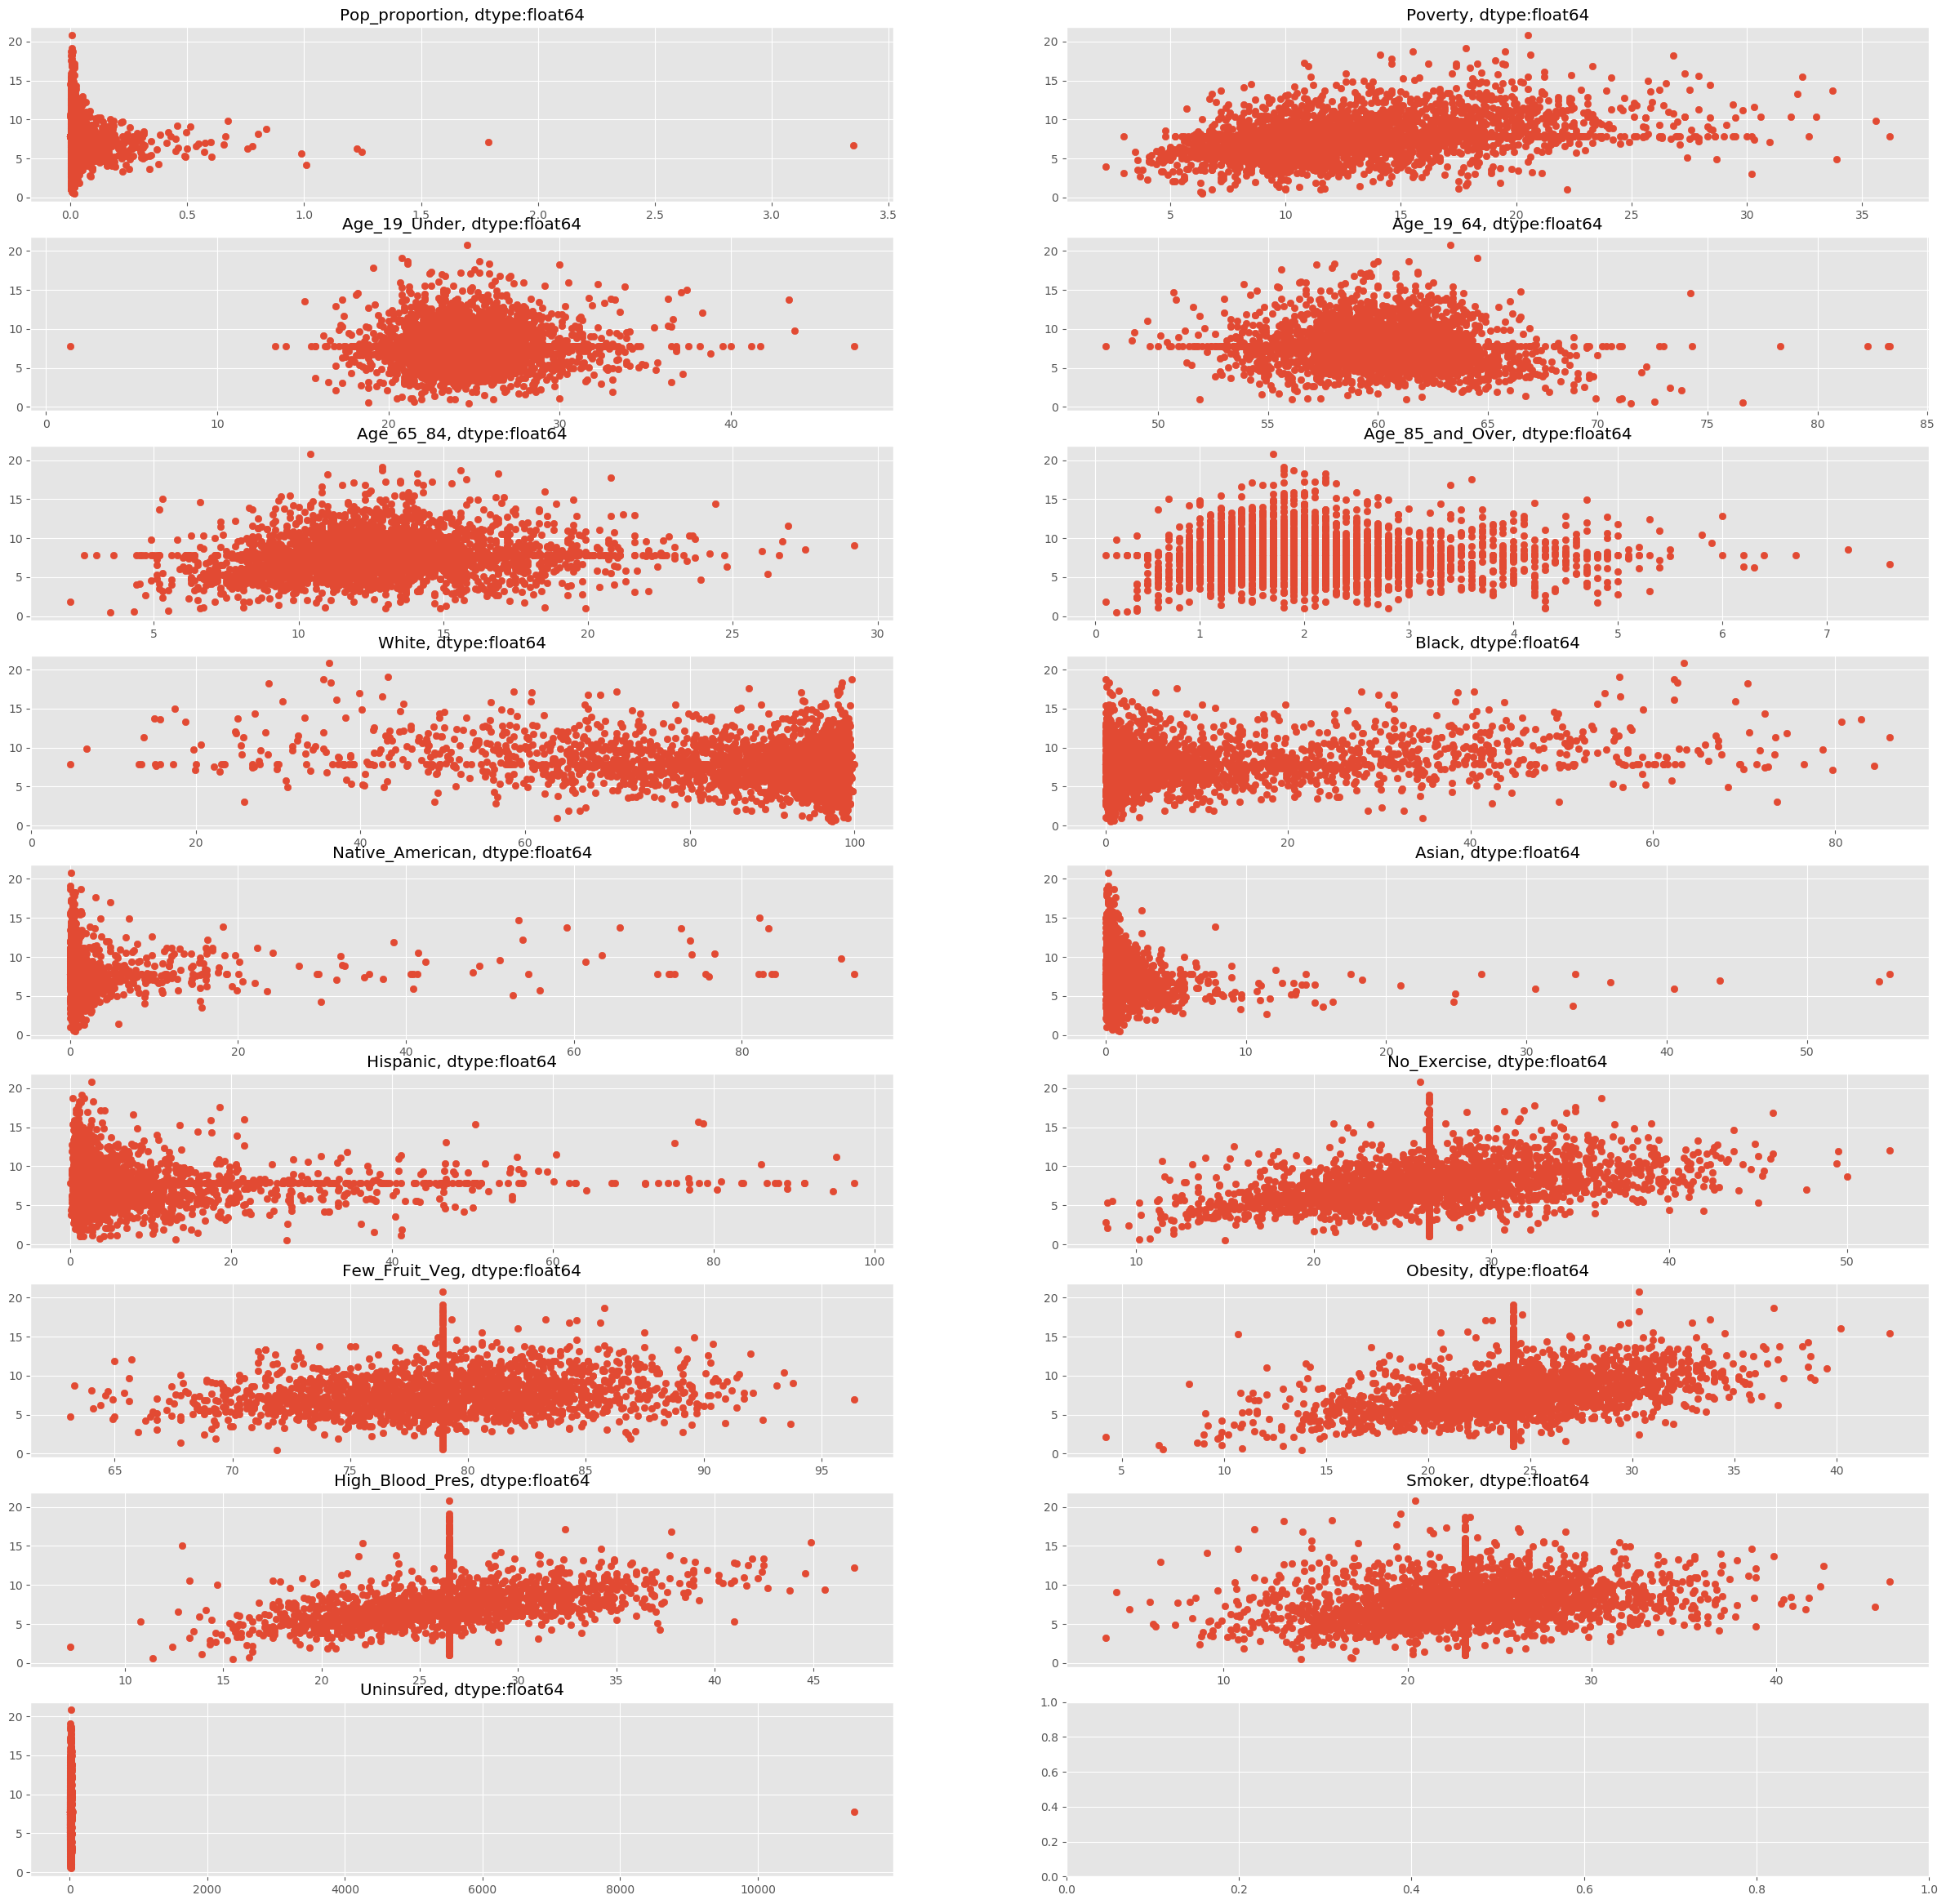

In [49]:
make_column_scatters(risk_dem, 'Diabetes', select_columns=col_list)

In [38]:
data_pred = risk_dem.iloc[:,6:24]
data_pred.head()

,Poverty,Age_19_Under,Age_19_64,Age_65_84,Age_85_and_Over,White,Black,Native_American,Asian,Hispanic,Pop_proportion,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,Uninsured
0,10.4,26.9,62.3,9.8,0.9,80.7,17.3,0.5,0.6,1.7,0.016400,27.800000,78.600000,24.500000,29.100000,26.60000,14.2,5690.0
1,10.2,23.5,60.3,14.5,1.8,88.4,9.9,0.5,0.4,2.3,0.054852,27.200000,76.200000,23.600000,30.500000,24.60000,7.2,19798.0
2,22.1,24.3,62.5,11.6,1.6,52.2,46.8,0.4,0.3,3.1,0.009586,26.508386,78.923162,25.600000,26.480946,17.70000,6.6,5126.0
3,16.8,24.6,63.3,10.9,1.2,76.8,22.5,0.3,0.1,1.4,0.007259,26.508386,86.600000,24.145189,26.480946,23.11288,13.1,3315.0
4,11.9,24.5,62.1,12.1,1.3,97.1,1.5,0.5,0.2,6.3,0.018800,33.500000,74.600000,24.200000,26.480946,23.60000,8.4,8131.0


In [36]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

newX = data_pred.drop('Diabetes',axis=1)
newY = data_pred['Diabetes']

X_train,X_test, y_train, y_test = train_test_split(newX, newY, test_size=0.5, random_state=3)

lr = LinearRegression()
lr.fit(X_train, y_train)

ValueError: could not convert string to float: 'Sherman'

In [ ]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)

In [ ]:
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)

In [ ]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()